In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Simulation de Aloha

In [1]:
def simulation_aloha(T, proba_nouvel_utilisateur, proba_transmission):
    n = 0
    personnes_en_attente = []
    for t in range(T):
        n = (n + (1 if np.random.rand() <= proba_nouvel_utilisateur else 0)
             - (1 if np.random.rand() <= n*proba_transmission*(1-proba_transmission)**(n-1) else 0) )
        personnes_en_attente.append(n)
    return personnes_en_attente

In [2]:
plt.plot(simulation_aloha(10000,0.23,0.1)) # Essayer avec T=10**6

NameError: name 'plt' is not defined

# Génération d'aléatoire

## Génération uniforme

Supposons que l'on sache générer X uniformément sur A et que l'on veuille générer X uniformément sur B.

Algorithme: 
- Générer X tant que X \not\in B 

## Incorrect

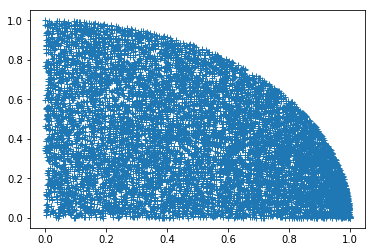

In [4]:
X = []
Y = []
for t in range(10000):
    x = np.random.rand()
    y = 10
    while x**2 + y**2 > 1: 
        y = np.random.rand()
    X.append(x)
    Y.append(y)
plt.plot(X,Y,'+')

## Correct 

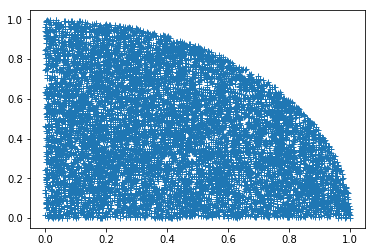

In [12]:
X = []
Y = []
for t in range(10000):
    x=0
    y = 10
    while x**2 + y**2 > 1:
        x = np.random.rand()
        y = np.random.rand()
    X.append(x)
    Y.append(y)
plt.plot(X,Y,'+')

## Génération de densité

On veut générer X sur [0,1] proportionellement à $x$:

(array([ 17.,  32.,  57.,  71.,  82., 121., 129., 129., 163., 199.]),
 array([0.03186417, 0.12865019, 0.22543622, 0.32222224, 0.41900827,
        0.51579429, 0.61258031, 0.70936634, 0.80615236, 0.90293839,
        0.99972441]),
 <a list of 10 Patch objects>)

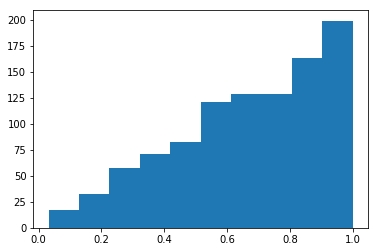

In [10]:
def generate():
    while True:
        x = np.random.rand()
        if np.random.rand() <= x:
            return x
h = [generate() for i in range(1000)]
plt.hist(h)

# Monte-Carlo (estimation de $\pi$)

In [13]:
def estimation(T):
    v = []
    for t in np.arange(1,T):
        x = np.random.rand()
        y = np.random.rand()
        v.append([1 if x**2+y**2<1 else 0])
    estimate = 4*np.cumsum(v)/np.arange(1,T)
    return estimate[10:]

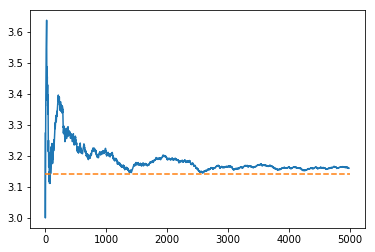

In [14]:
T = 5000
for i in range(1):
    plt.plot(estimation(T))
plt.plot([0,T],[np.pi,np.pi],'--')
#plt.ylim([3,3.3])

# Recuit-simulé et voyageur de commerce

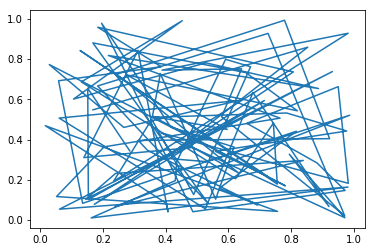

In [2]:
X = [np.random.rand() for i in range(100)]
Y = [np.random.rand() for i in range(100)]
plt.plot(X,Y,'-')


In [3]:
def cost(X,Y,sigma):
    c = 0
    for i in range(len(X)-1):
        c += (X[sigma[i+1]]-X[sigma[i]])**2 + (Y[sigma[i+1]] - Y[sigma[i]])**2
    return c

def plot_switched(X,Y,sigma,times,costs):
    Xm = [X[i] for i in sigma]
    Ym = [Y[i] for i in sigma]
    plt.clf()
    plt.subplot(2,1,1)
    plt.plot(Xm,Ym)
    plt.subplot(2,1,2)
    plt.plot(times,costs)
    plt.plot([0,max(times)],[min(costs),min(costs)],'--')
    plt.xlabel('min_costs={}'.format(min(costs)))
    plt.pause(0.001)

def switch_two_cities(sigma,i,j):
    sigma_new = [i for i in sigma]
    sigma_new[i] = sigma[j]
    sigma_new[j] = sigma[i]
    return sigma_new

def switch_two_random_cities(sigma):
    return switch_two_cities(sigma,np.random.randint(len(sigma)-1), np.random.randint(len(sigma)-1) )

%matplotlib qt
fig = plt.figure()
sigma = [i for i in range(100)]
costs = [cost(X,Y,sigma)]
times = [0]
t = 0

In [4]:
i=0
for newT in range(100000):
    t+=1
    sigma_new = switch_two_cities(sigma,i,i+1)
    i = (i+1) % (len(X)-1)
    if cost(X,Y,sigma_new) < costs[-1]:
        sigma = sigma_new
        costs.append(cost(X,Y,sigma_new))
        times.append(t)
        plot_switched(X,Y,sigma,times,costs)


In [19]:
for newT in range(100000):
    t+=1
    sigma_new = switch_two_random_cities(sigma)
    if cost(X,Y,sigma_new) < costs[-1]:
        sigma = sigma_new
        costs.append(cost(X,Y,sigma_new))
        times.append(t)
        plot_switched(X,Y,sigma,times,costs)


In [5]:
for newT in range(100000):
    t+=1
    sigma_new = switch_two_random_cities(sigma)
    if cost(X,Y,sigma_new) < costs[-1]:
        sigma = sigma_new
        costs.append(cost(X,Y,sigma_new))
        times.append(t)
        plot_switched(X,Y,sigma,times,costs)


In [7]:
temperature = 0.01 #*1e-10
for newT in range(10000):
    t += 1
    sigma_new = switch_two_random_cities(sigma)
    new_cost = cost(X,Y,sigma_new)
    print(np.exp( - new_cost + costs[-1] ))
    if new_cost < costs[-1] or np.random.rand() <= np.exp( (- new_cost + costs[-1])/temperature ):
        costs.append(cost(X,Y,sigma_new))
        times.append(t)
        sigma = sigma_new
        plot_switched(X,Y,sigma,times,costs)


0.355776405426222
0.6323884035146523
0.8857115803542535
0.5031634313679847
0.7296231394616173
0.3227242212973931
0.5641459828345085
0.021903641484152185
0.8607320537656944
0.14919079467422025
0.3734349866415113
0.6547169239750672
0.18506166446660635
0.29293271586727393
0.20555560671328388
0.750274843170002
0.8145170547030217
0.4189059708212262
0.4874927779694829
0.6771488493797015
0.5181943803012501
0.15599339580643198
0.09831840218048347
0.8074269060866823
0.38833593937408545
0.29293271586727393
0.4643596885453384
0.737049954768621
0.29293271586727393
0.8612133363609905
0.19780640400386787
0.5100593926569522
0.9508578800222154
0.9701132601398977
0.06686772323153299
0.6372608066889677
0.13164085142990328
0.4416151536873705
0.17677450354232682
0.30385517031509157
0.02970502726937412
0.3137772336342262
0.7658325687019539
0.09261434376602812
0.7778127640192227
0.5103552982532047
0.7547298389550811
0.5964414730729684
0.4644164587797696
0.7690264107905722
0.5542579460465167
1.0
0.3726795464

0.9731047217673152
0.25904250330167394
0.6207038001812241
0.17941498934055378
0.935987645500823
0.19703471065381103
0.6555616139897074
0.11039408750644927
0.2067204491578597
0.8686444295113618
0.03969005917932439
0.5724268026459034
0.3495887817797429
0.8224510941451922
0.07512791886650975
0.22881850618413663
0.7647025941679567
0.12065337610960479
0.761853028623855
0.6141677293416996
0.7848310187435774
0.44893229434848064
0.24532245477240883
0.6356386010556513
0.8554652641663829
0.6222333337491156
0.818689717080788
0.6905026934872615
0.013398508162597102
0.495168213852325
0.6695994880251617
0.3731111863679836
0.3930538447583519
0.11297401216670168
0.9174442011298696
0.12181491958481722
1.0
0.44039176573986766
0.7681415422652625
0.3004028324925922
0.1954205838728371
1.0
0.08601812306276345
0.7235079797493289
0.35553718311464566
0.5716465343788152
0.16320785719409275
0.4112434125388998
0.263292081768259
0.0205265116120642
0.3914396167967977
0.13877702085841032
0.15464889874878313
0.021952

0.008681997610913457
0.024241659551944076
0.8557578161687424
0.45338499224375856
0.2075726575616613
0.27539433168000577
0.1479761185525084
0.009969644755376742
0.552757343034317
0.11629630355481375
0.09890326029974265
0.40113189592797005
0.5964414730729686
0.4881272273678054
0.5726774603902726
0.5835566892817637
0.8533347915774159
0.6312885468328485
0.8483547765094944
0.30927466561365
1.00140814814971
0.4804169586027058
0.38699407366937466
0.18159080152970056
0.017090384305476592
0.2953089718174777
0.977224141179751
0.47606913007606755
0.07033052612729708
0.061080130096537455
0.1082303786401716
0.3675868013524206
0.074017451624394
0.10666138499032124
0.05932467409731568
0.787769694440926
0.46052525141113804
0.6705030161813702
0.5276428132481719
0.14739672582508415
0.8640937999764233
0.2699274666918984
0.9985938319432373
0.3737344788008229
0.29790378235037374
0.3055128331559858
0.0846128522320444
0.7658453771102445
0.16822657075302913
0.6095638512714605
0.5274648814789767
0.164783675808

0.2859935576508608
0.3020129907133052
0.515383064357865
0.04242256631221022
0.3161757222519988
0.8514659573836539
0.13409048262701648
0.7809927915349975
0.29978616025316507
0.38025802086501753
0.5703514730679046
0.3388674746749712
0.7681415422652632
0.022247755312343867
0.14819501003418206
0.7156178039989198
0.2776959737377777
0.23964615949597182
0.6396075097801461
0.2630950494750459
0.20747693603189302
0.9821679935340507
0.13517210903888052
0.13587663963168817
0.9614647864419875
0.38908210573481916
0.7949535276927151
0.7232203191874793
0.38722975966388723
0.16016273813688958
0.43938157683193235
0.6987921097785308
0.6081584451109994
0.11111651077151345
0.49516821385232546
0.26411613667553663
0.11835895274639155
0.3667826914059765
0.4769266690426564
0.06841986033395221
0.0720774370239558
0.7744977130959981
0.8638713651092103
0.561700129359971
0.3853579065814742
1.0
0.782030621588261
0.9036432361364732
0.16487787593839479
1.0
0.759857508771661
0.152651726909168
0.0932373036064283
0.73121

0.1391720009622599
0.33808065249945274
0.03516133588440182
0.6101943148368068
0.1629810563244406
0.5448428747297632
0.8433204786817373
0.6974887510755947
0.24554073777500743
0.7809927915349975
0.19966293079967465
0.547260809566071
0.3299080119234879
0.7337686963644612
0.50285426665876
0.7822804697569343
0.9644697244302931
0.9280644709526881
0.7272306024916471
0.04363101620707762
0.2711336676311893
0.5515224693813878
0.4170048949535422
0.351081089751097
0.08037372391537918
0.2721648255983497
0.02487065764265336
0.29430464482275653
0.26191155932185284
0.5262747898074672
0.14419202548992682
0.8956833115727065
0.40470399457004946
0.8215218369015317
0.11239368179289526
0.028757920152824145
0.9172505044906316
0.3502274388338852
0.8395225461909762
0.5729465158545879
0.9997186352827372
0.7618632591692297
0.5531949711002799
0.07358117110351287
0.39538924071519194
0.43775511829022157
0.06696061553979486
0.2124251682460136
0.227036885052741
0.20256594058283658
0.052692161502122845
0.2396461594959

0.7078625665177705
0.9148853161048848
0.9174442011298696
1.0
0.7993450291875722
0.38444439981305556
0.13063723992485368
0.1839087901451577
0.4137546510069696
0.0655401337608654
0.6448156826474644
0.6756561716264546
0.1837933329600556
0.3263177305208389
0.005633220451197096
0.4105110274613693
0.540218426419748
0.5245726086599429
0.8213780802726665
0.4078552554804563
0.965792822173565
0.34330678425962774
0.4398575734155272
0.3734349866415113
0.13119389965509817
0.09313252369663368
0.02424165955194404
0.41531542156699564
0.4501972919851726
0.4568098464915487
0.1525120344363415
0.7332629456766241
0.11195112160506952
0.7537243190326469
0.8029567316792556
0.25883090660276004
0.6078729016287595
0.8820011290616319
0.5423422243309898
0.0802684343274883
0.6881128773587148
0.8751874418930843
0.28277658099500896
0.6209695880490522
0.19563628744535533
0.29075997452109886
0.5145105571644456
0.4640146206831744
0.8403498064705538
0.07931614394757057
0.847473648317376
0.20506092200160772
0.070823055519

0.5519234858500272
0.4616445074614947
0.22920508988156352
0.6844476328374773
0.041282230336073776
0.1463608759367925
0.8988744708152344
0.425022579165226
0.27503471239471183
0.9688673100339009
0.039892570737178765
0.8015133013615149
0.6572612731568385
0.4610651362575014
0.1587223957399135
0.13119389965509803
0.1795661505252192
0.8406294792078375
0.84474922334517
0.22047361537266777
0.5252058978045221
0.426284682017852
0.34138858089222157
0.6144784188719481
0.560961984352035
0.4539071406913381
0.6547190967063152
0.3496704609351248
0.40366066229181324
0.029192956396346937
0.5213327445982417
0.8391054624707422
0.17597807493159698
0.07962532635078118
0.9360572724204447
0.1655712965179366
0.41445423740115506
0.2651091557405846
0.7658453771102445
0.9644697244302931
0.16856111618201608
0.9791983477414626
0.3809934117027278
0.7121825533552301
0.503578544784258
0.07326763076200238
0.3842927991023721
0.5262747898074674
0.567342006022994
1.0103014365895087
0.5601076089403861
0.6913625721541398
0.

0.16661324271329464
0.12715853044208683
0.15438072894408317
0.27322358591614293
0.2830380020201639
0.09080941222864972
0.16856111618201652
0.10326225254335049
0.28126834791566585
0.5315223436629877
0.11309860838027194
0.9499806663806276
0.04099042117736445
0.7041399612394608
0.10825875850500953
0.3015149215708787
0.48594870894136916
0.702051103331861
0.4704086972999733
0.24328957204263857
0.033656411168466696
0.0959972983628107
0.22941220835600373
0.20351861924702855
0.1198615404279589
0.005807784808684258
0.36959879642542237
0.11925591356383022
0.7609714103708057
0.10331317252318148
0.6509117704034705
0.3509723781244299
0.009852090490479616
0.7763916791157159
0.07273153187929378
0.7077081915318607
0.31249831277708057
0.7002140816514797
0.32855261304970257
0.3340639341330831
0.8699954568076544
0.24020261600024825
0.9430011049773868
0.49548539766795696
0.04849362872751947
0.9048904710405056
0.4272769276057175
0.4972197936531884
0.24751422423598782
0.3782218846568882
0.06554268100100766


0.5308324868267411
0.08669638432117517
0.9533704847706469
0.2571279425276132
0.19833470195825137
0.36859787956356904
0.09986356107634652
0.49175308494757936
0.31950840174917144
0.5490394937811282
0.46254056190835907
0.07979469853835693
0.043590552148201005
0.8888538941348347
0.6906103927916559
0.9407045908326807
0.9360572724204447
0.37378189110224064
0.5605589169205173
0.0902195148995772
0.07750801010484801
0.8312761572782952
0.4357370690673539
0.41481700731746146
0.28293988863685715
0.18935058174398123
0.6906103927916559
0.5696867430511248
0.5968339215799554
0.10023292806158599
0.48796407055411967
0.6764399779395452
0.5072067378169034
0.5988571687488337
0.6816229647374974
0.9563815894334877
0.715574427910897
0.49175308494757936
0.9320690515979912
0.032829979932935766
0.871809322849845
0.023543398536345274
0.28629141396630897
0.08424607313904224
0.37038404649965817
0.2158746509591496
0.3792034078377521
0.5198298773920897
0.1965881586718987
0.3128123448047055
0.09657319988228578
0.60227

0.9166828265589506
0.24518731453365955
0.2964439846259482
0.1099701935748388
0.1771583517797466
0.9970373891293784
0.9758603882803488
0.9447501953081844
0.31939115294251164
0.6891053823937813
0.12767755828276423
0.0690160068999785
0.028739573995559983
0.8702194983667784
0.1613358644949734
0.007004028943152445
0.37453642402093296
0.14725565481698594
0.06599581773697333
0.7788120541751378
0.03994729619181506
0.33094022385282335
0.2857356557627718
0.7944539043777322
0.7499140065641027
0.6618174708630469
0.5010033315792227
0.07203906913813805
0.9407045908326807
0.576769672187993
0.5570335897425395
0.6560610287555536
0.5929722395825181
0.05162654200982749
0.9868796489649541
0.2328449948408155
0.4314626127269104
0.4148107461798754
0.12835502336100404
0.9058350415040086
0.05329089275390883
0.42752017071466425
0.19529296369391416
0.34468532376559585
0.5239574585594784
0.23567061162097233
0.04164072794035114
0.5665440317987722
0.7118832768611294
0.8951850057757786
0.2466223323503574
0.767721380

0.3857963079637974
0.2067825728226527
0.10360362626791716
0.3125974225977073
0.783102673237489
0.6778560434562803
0.0898888836349528
0.5353107091589365
0.04684844895429002
0.26597147449877645
0.49782706160837226
0.12433773102999879
0.44942594535912844
0.1398931791198081
0.053397516905861024
0.19919396078885276
0.4514160867966358
0.054215731189950156
0.7444492955226483
0.11005862981219468
0.304744981567459
0.4904261831560306
0.7625388567413153
0.0349280897460983
0.4494577633268128
0.2345583932931271
0.6974746308456748
0.06702403891655156
0.10461424257111654
0.1656233916908927
0.6185711560070222
0.08945958366935061
0.12104003097882711
0.17572289607419458
0.4707956619795537
0.663882732207734
1.0064726089909533
0.4730049047331259
0.7261144732091531
0.5684479688831411
0.9837977901596211
0.13438893601081223
0.9941100037858083
0.12296162577272667
0.24881543987964186
0.17743469540671053
1.0
0.5551760612095311
0.2184502696892744
0.48023100457454737
1.0
0.5228648434786347
0.5697459250333464
0.71

0.11395829970173889
0.046538296984257585
0.32712187113414165
0.722863449719691
0.4311890570609995
0.6853438378100438
0.47761551825717863
0.3758513473409059
0.8638713651092103
0.3308422982139694
0.004515905836749669
0.552992925731089
0.4640146206831744
1.0338516329545329
0.22260212379472444
0.6280932484762446
0.24959051239467084
0.061177759887660686
0.9975003245930893
0.47663186580880135
1.0
0.03786587602352204
0.9777546223268978
0.5565933804173668
0.20848954673822703
0.5067382818636285
0.28293988863685726
0.44975800770387037
0.07727747666501356
0.4107655580509168
0.5372576050501255
0.45412717432287586
0.8999362043240511
0.2051356281939895
0.8567469708400686
0.6521752984370085
0.0852168903274788
0.4028143829592996
0.45948193857015796
0.6891053823937806
0.33193890096539896
0.5202117925973564
0.13971250327449397
0.8630653862243945
0.7191553355963979
0.18355745613135815
0.1903460419271782
0.8870163716081493
0.8235014184950987
0.5715449383121816
0.19686752244654593
0.8212714719100914
0.6981

0.8189797339212566
0.6853438378100438
0.925545731180741
0.13195445288064536
0.29690901753881704
0.16463655510754568
0.745506859687279
0.678152020700109
0.7499251403939664
0.767168133510388
0.1831843373485655
0.46543085623953756
0.512020288023368
0.3016883133271279
0.5934847170837096
0.2567421604483029
0.7356555270945653
0.6268839524128602
0.5214511606143792
0.3486959596432577
0.46597502473290364
0.4515968800716167
0.745506859687279
0.8829299656105858
0.6797414734770002
0.8109187856648759
0.9864835299041618
0.2537223571177471
0.018258048648530627
0.2633812700645054
0.13580675634670203
0.21382072063214197
0.7780166236511424
0.02352760519852606
0.4152791771799403
0.6060253624334536
0.08344897958424122
0.6419389312729855
0.837306847396912
0.6761526507090342
0.05844425370111371
0.46537222066182676
0.4389814586142213
0.1850413961018908
0.09916460205830235
0.03234431005559621
0.03502693896263927
0.22697933340879317
0.15541514781644683
0.21395066433878002
0.09415391019027854
0.503515901859527


0.5467905593330642
0.110838426483694
0.38620584379788914
0.6213963989594846
0.09532185439358967
0.531887235582786
0.8828645630090539
0.7183508508273063
0.8959625668493177
0.8420651065044595
0.36207033899103247
0.9223725563376172
0.08930830928863379
0.5799642981359291
0.33561137215862213
0.47939600550698463
0.09694990637099803
0.805244630153745
0.8809050347298101
0.9195192300514358
0.759095364773346
0.7755760678747767
0.07218429659639386
0.07250769702309233
0.6798047625081297
0.6585221166225086
0.33203746879097684
0.027123761603421736
0.9491203896721312
0.1841034225776265
0.13776763036608894
0.13553378179888892
0.25813981975071454
0.6937852886409182
0.33118666382328216
0.03540523943955108
0.38914780837572777
0.6564077861840527
0.12965574763207563
0.8494894749225558
0.15974532387189416
0.3797596228015357
0.2438205410768689
0.15596288333779187
0.8060043830684895
0.45859626551016497
0.10614638064032267
0.2459394825679188
0.18940642868034435
0.29485207895166793
0.6844772469867912
0.65606102

0.05248479624420154
0.011980448979680512
0.9701587283737019
0.21815864179369626
0.40617448813459084
0.01204941463133098
0.9767251260673279
0.5952986493547359
0.16346277421510425
0.16291007754102158
0.7613816436745476
0.495680516813523
0.037489814398860975
0.6142309448496888
0.928746295127105
0.8649682567568603
0.9299638999123443
0.4014752539002171
0.6980867578731884
0.13577690576201043
0.10087284998289427
0.5142542457823882
0.5848152364609508
0.7324224005668728
0.4817054406064969
0.25850191916216064
0.9679763300280108
0.1601602482115427
0.8266544094150295
0.4640151559886425
0.5219515956092691
0.47310177129773107
0.15470362508198715
0.02575009277036415
0.5590737256213856
0.3030955161536867
0.14590759660958982
0.9395535769223206
0.9929014141054096
0.8036746206946797
0.3883154673160172
0.021976019495401327
0.9006627310135207
0.5963674488643066
0.08231409535759922
0.01825804864853064
0.3355494619103619
0.1280000727596095
0.054121087962448605
0.5762807419467554
0.8655370574274714
0.83846773

0.4214018833918953
0.24344844219001577
0.4159011324124499
0.4010506581732754
0.2804195164595586
0.6489885960303393
0.12491861469949692
0.7626149411861489
0.493770262744862
0.4865687138714989
0.7847844215527577
0.16273176183695234
0.5501486357364256
0.03840518670080632
0.24206050514237168
0.28992965105466956
0.08479703747108633
0.3282907483387052
0.3122915938380806
1.0
0.6358441758624879
0.7792469522238453
0.6107123440187116
0.42338755454001054
0.20436861365030778
0.5534858381646414
0.9597635816176479
0.2378149093003168
0.4422842024957669
0.796369133165471
0.1110400701061471
0.8298993219145326
0.9591150427485304
0.5143533051728256
0.26426956583340433
0.4787172732861243
0.5599339111825312
0.08310469814264106
0.7304242496389608
0.1113944583040755
0.25729491042834424
0.4530682807859255
0.2522659932351416
0.006236790491330599
0.13751172028730554
0.15144562661342625
0.23431293230881428
0.3637344519849475
0.5651555080345755
0.35103669567491225
0.8090102197919129
0.23913400474179217
0.65964182

0.08953213853144502
1.0118726888885254
0.7656565200627606
0.7141487509878285
0.7070322961186893
0.22492070684614465
0.2716542937748215
0.3817414432114319
0.13007869977835854
0.2759932523505513
0.24481071078453506
0.5943708661322153
0.38069815263462164
0.9107506576446273
0.1796638268434372
0.33900523715595143
0.49967919409791844
0.6937550666201513
0.7983867957052898
0.08706629495927937
0.14063383011912936
0.019647312532690236
0.2503697613119012
0.9594091287054408
0.5460324222179105
0.948205805927865
0.08265871990868837
0.28160015472404293
0.5646784989281077
0.5512877153289053
0.7640511790864216
0.273414041224749
0.3719553287813193
0.013177813490150923
0.934325465456315
0.11640028048976858
0.8137120796398022
0.29185838543790216
0.39608229509863196
0.28375586825350985
0.6672108396792703
0.3448186456409699
0.3273406749263425
0.6748795301326981
0.04101954527833428
0.06619779140129249
0.1450494915749067
0.2147584521872979
0.7787989494392934
0.9162237285675745
0.19946860805573602
0.6994823226

0.42404807897454755
0.8743473759839423
0.07473398606146972
0.22271291319655367
0.4823398429502747
0.055892142203648805
0.17000835426757963
0.4720849353283848
0.08455737493345933
0.4421657854580868
0.6052246436593859
0.15606665484747934
0.4121164962891972
0.04009830050304804
0.5613320088366152
0.9932255889754686
0.6158598731748506
0.0653945341857921
0.6629426933667548
0.7891036118732534
0.019805542596126123
0.180668177895315
0.45565647994207226
0.5730558653840867
0.6240953231526575
0.9902412537854127
0.9914822343508668
0.10531073011723362
0.4526905177861667
0.16679114484922672
0.9744410343729716
0.722863449719691
0.23357369036251333
0.012286914614134217
0.6574001767078614
0.137380669078545
0.1390916773266186
0.6005856013358305
0.8710798168575533
0.12296162577272644
0.07535845753894205
0.05455284315640404
0.9732440953859086
0.3946945190359135
0.05522186183723876
0.21061314376917378
0.8841599282314443
0.1912018185668801
0.11910931058880717
0.2878800261349546
0.780763944906677
0.7108809292

0.022684003097247423
0.8781118020196539
0.2856438100096794
0.35560698828600285
0.7884292299371943
0.8584106646255756
0.8610541381456904
0.2616397428003034
0.9562237799206353
0.8189250362179072
0.7722726438036219
0.2090585410704793
0.6336444824965004
0.5687391772369249
0.7610114434587871
0.7682625811019789
0.11593059904288794
0.07814394222217498
0.34255960265723556
0.7374837211443986
0.4556564799420727
0.8702067557328019
0.39271105735766376
0.23599442530242862
0.9595876524204451
0.7956559114927629
0.2682554749234568
0.49876571744794623
0.09103280945560908
0.48529024932861625
0.043467854819944245
0.8870934632714575
0.5396272092609297
0.22952943123806444
0.1199006135927832
0.1368003654620245
0.40464346468398044
0.2242391645286413
0.16225677842186406
0.9399388643152556
0.4034159907886298
0.23266171938500613
0.11913331058742838
0.336521940062261
0.9281257228159591
0.9346298357330044
0.6936870240291133
0.11649227028608204
0.04501260659792296
0.31481514321013404
0.9350984722360698
0.195729593

0.581697663830513
0.740526187387263
0.48655077476642894
0.5119902421420346
0.32295035730103594
0.4616397707641632
0.8814179892620041
0.20779546653715045
0.4347513138512469
0.7787482585550312
0.46420684854967187
0.7891202785555236
0.748622807665258
0.5184177932201547
0.7403957239856314
0.20049359194939295
0.5542203348886426
0.5188452792029656
0.6604688737884306
1.0
0.19005470458242132
0.7512742079274499
0.16110900693867583
0.7287597498280696
0.610565325513798
0.5007112674972239
0.10699281059507473
0.5322579858010352
0.06745181364244547
0.5085590024070453
0.4098509876204621
0.03783810788472964
0.3255838024818132
0.09478586527388981
0.8987637900408225
0.3061859697316081
0.06157534011749404
0.069463942087414
0.704375494803926
